In [1]:
%matplotlib inline
import numpy
import matplotlib.pyplot as plt

# Root Finding and Optimization

**GOAL:** Find where $f(x) = 0$.

### Example:  Future Time Annuity

When can I retire?

$$ A = \frac{P}{(r / m)} \left[ \left(1 + \frac{r}{m} \right)^{m \cdot n} - 1 \right ] $$

$P$ is payment amount per compounding period

$m$ number of compounding periods per year

$r$ annual interest rate

$n$ number of years to retirement

$A$ total value after $n$ years

If I want to retire in 20 years what does $r$ need to be?

Set $P = \frac{\$18,000}{12} = \$1500, ~~~~ m=12, ~~~~ n=20$.

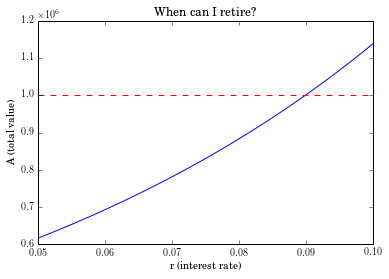

In [2]:
def total_value(P, m, r, n):
    """Total value of portfolio given parameters
    
    Based on following formula:
    
    A = \frac{P}{(r / m)} \left[ \left(1 + \frac{r}{m} \right)^{m \cdot n}
                - 1 \right ] 
    
    :Input:
     - *P* (float) - Payment amount per compounding period
     - *m* (int) - number of compounding periods per year
     - *r* (float) - annual interest rate
     - *n* (float) - number of years to retirement
     
     :Returns:
     (float) - total value of portfolio
     
    """
    
    return P / (r / float(m)) * ( (1.0 + r / float(m))**(float(m) * n)
                                 - 1.0)

P = 1500.0
m = 12
n = 20.0
    
r = numpy.linspace(0.05, 0.1, 100)
goal = 1e6

fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)
axes.plot(r, total_value(P, m, r, n))
axes.plot(r, numpy.ones(r.shape) * goal, 'r--')
axes.set_xlabel("r (interest rate)")
axes.set_ylabel("A (total value)")
axes.set_title("When can I retire?")
axes.ticklabel_format(axis='y', style='sci', scilimits=(-1,1))
plt.show()

## Fixed Point Iteration

How do we go about solving this?

Could try to solve at least partially for $r$:

$$ A = \frac{P}{(r / m)} \left[ \left(1 + \frac{r}{m} \right)^{m \cdot n} - 1 \right ] ~~~~ \Rightarrow ~~~~~$$

$$ r = \frac{P \cdot m}{A} \left[ \left(1 + \frac{r}{m} \right)^{m \cdot n} - 1 \right ] ~~~~ \Rightarrow ~~~~~$$

$$ r = g(r)$$
or 
$$ g(r) - r = 0$$

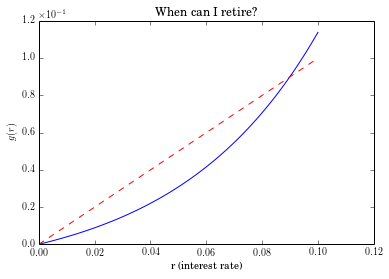

In [3]:
def g(P, m, r, n, A):
    """Reformulated minimization problem
    
    Based on following formula:
    
    g(r) = \frac{P \cdot m}{A} \left[ \left(1 + \frac{r}{m} \right)^{m \cdot n} - 1 \right ]
    
    :Input:
     - *P* (float) - Payment amount per compounding period
     - *m* (int) - number of compounding periods per year
     - *r* (float) - annual interest rate
     - *n* (float) - number of years to retirement
     - *A* (float) - total value after $n$ years
     
     :Returns:
     (float) - value of g(r)
     
    """
    
    return P * m / A * ( (1.0 + r / float(m))**(float(m) * n)
                                 - 1.0)

P = 1500.0
m = 12
n = 20.0
    
r = numpy.linspace(0.00, 0.1, 100)
goal = 1e6

fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)
axes.plot(r, g(P, m, r, n, goal))
axes.plot(r, r, 'r--')
axes.set_xlabel("r (interest rate)")
axes.set_ylabel("$g(r)$")
axes.set_title("When can I retire?")
axes.set_ylim([0, 0.12])
axes.ticklabel_format(axis='y', style='sci', scilimits=(-1,1))
plt.show()

Guess at $r_0$ and check to see what direction we need to go...

1. $r_0 = 0.0800$, $g(r_0) - r_0 = -0.009317550125425428$
1. $r_1 = 0.0850$, $g(r_1) - r_1 = -0.00505763375972$
1. $r_2 = 0.0875$, $g(r_2) - r_2 = -0.00257275331014$

A bit tedious, we can also make this algorithmic:


In [4]:
r = 0.09
for steps in xrange(10):
    print "r = ", r
    print "Residual = ", g(P, m, r, n, goal) - r
    r = g(P, m, r, n, goal)
    print

r =  0.09
Residual =  0.000164727440507

r =  0.0901647274405
Residual =  0.000354277734037

r =  0.0905190051745
Residual =  0.000765861661241

r =  0.0912848668358
Residual =  0.00167404901814

r =  0.0929589158539
Residual =  0.00374864222552

r =  0.0967075580794
Residual =  0.00885788434491

r =  0.105565442424
Residual =  0.0237311213235

r =  0.129296563748
Residual =  0.088382496983

r =  0.217679060731
Residual =  1.11038120422

r =  1.32806026495
Residual =  1569787711.36



### Example 2:

Let $f(x) = x - e^{-x}$, solve $f(x) = 0$

Equivalent to $x = e^{-x}$ or $x = g(x)$ where $g(x) = e^{-x}$

Note that this problem is equivalent to $x = -\ln x$.

x =  0.4
Residual =  0.270320046036

x =  0.670320046036
Residual =  -0.158775212347

x =  0.511544833689
Residual =  0.0880237954988

x =  0.599568629188
Residual =  -0.0505202007037

x =  0.549048428484
Residual =  0.0284506521954

x =  0.57749908068
Residual =  -0.0161987010418

x =  0.561300379638
Residual =  0.00916637831975



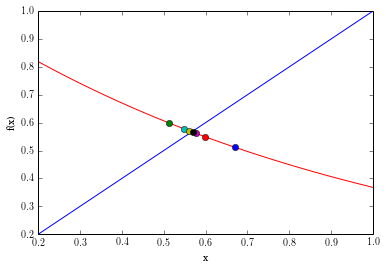

In [5]:
x = numpy.linspace(0.2, 1.0, 100)

fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)
axes.plot(x, numpy.exp(-x), 'r')
axes.plot(x, x, 'b')
axes.set_xlabel("x")
axes.set_ylabel("f(x)")

x = 0.4
for steps in xrange(7):
    print "x = ", x
    print "Residual = ", numpy.exp(-x) - x
    x = numpy.exp(-x)
    print
    axes.plot(x, numpy.exp(-x),'o',)

plt.show()

### Example 3:

Let $f(x) = \ln x + x$ and solve $f(x) = 0$ or $x = -\ln x$.

x =  0.5
Residual =  -0.19314718056

x =  0.69314718056
Residual =  0.326634259978

x =  0.366512920582
Residual =  -0.637208583721



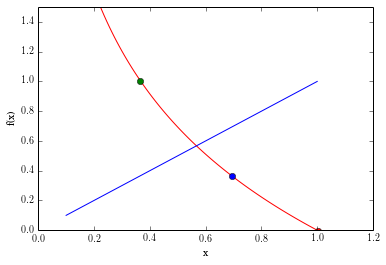

In [6]:
x = numpy.linspace(0.1, 1.0, 100)

fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)
axes.plot(x, -numpy.log(x), 'r')
axes.plot(x, x, 'b')
axes.set_xlabel("x")
axes.set_ylabel("f(x)")
axes.set_ylim([0.0, 1.5])

x = 0.5
for steps in xrange(3):
    print "x = ", x
    print "Residual = ", numpy.log(x) + x
    x = -numpy.log(x)
    print
    axes.plot(x, -numpy.log(x),'o',)

plt.show()

These are equivalent problems!  Something is awry...

## Analysis of Fixed Point Iteration

*Theorem*: Existence and uniqueness of fixed point problems

Assume $g \in C[a, b]$, if the range of the mapping $y = g(x)$ satisfies $y \in [a, b]~~~ \forall~~~ x \in [a, b]$ then $g$ has a fixed point in $[a, b]$.

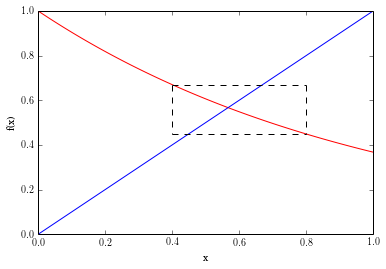

In [7]:
x = numpy.linspace(0.0, 1.0, 100)

fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)
axes.plot(x, numpy.exp(-x), 'r')
axes.plot(x, x, 'b')
axes.set_xlabel("x")
axes.set_ylabel("f(x)")

x = numpy.linspace(0.4, 0.8, 100)
axes.plot(numpy.ones(x.shape) * 0.4, numpy.exp(-x),'--k')
axes.plot(x, numpy.ones(x.shape) * numpy.exp(-x[-1]), '--k')
axes.plot(numpy.ones(x.shape) * 0.8, numpy.exp(-x),'--k')
axes.plot(x, numpy.ones(x.shape) * numpy.exp(-x[0]), '--k')

plt.show()

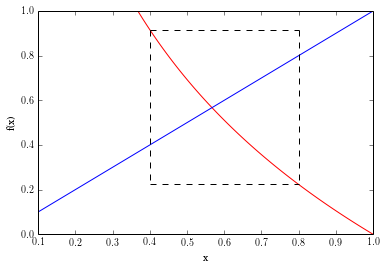

In [8]:
x = numpy.linspace(0.1, 1.0, 100)

fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)
axes.plot(x, -numpy.log(x), 'r')
axes.plot(x, x, 'b')
axes.set_xlabel("x")
axes.set_ylabel("f(x)")
axes.set_ylim([0.0, 1.0])

x = numpy.linspace(0.4, 0.8, 100)
axes.plot(numpy.ones(x.shape) * 0.4, -numpy.log(x),'--k')
axes.plot(x, numpy.ones(x.shape) * -numpy.log(x[-1]), '--k')
axes.plot(numpy.ones(x.shape) * 0.8, -numpy.log(x),'--k')
axes.plot(x, numpy.ones(x.shape) * -numpy.log(x[0]), '--k')

plt.show()

Additionally, suppose $g'(x)$ is defined for $x \in [a,b]$ and $\exists K < 1$ s.t. $|g'(x)| \leq K < 1 ~~~ \forall ~~~ x \in (a,b)$, then $g$ has a unique fixed point $P \in [a,b]$

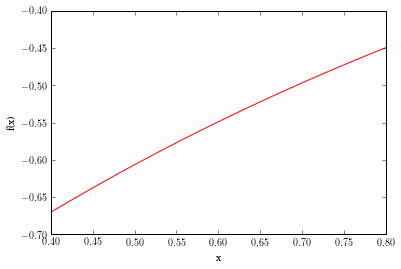

In [9]:
x = numpy.linspace(0.4, 0.8, 100)

fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)
axes.plot(x, -numpy.exp(-x), 'r')
axes.set_xlabel("x")
axes.set_ylabel("f(x)")
plt.show()

*Theorem 2*: Asymptotic convergence behavior of fixed point iterations

$$x_{k+1} = g(x_k)$$

Assume that $\exists ~ x^*$ s.t. $x^* = g(x^*)$

$$x_k = x^* + e_k ~~~~~~~~~~~~~~ x_{k+1} = x^* + e_{k+1}$$

$$x^* + e_{k+1} = g(x^* + e_k)$$

Using a Taylor expansion we know

$$g(x^* + e_k) = g(x^*) + g'(x^*) e_k + \frac{g''(c) e_k^2}{2}$$

$$x^* + e_{k+1} = g(x^*) + g'(x^*) e_k + \frac{g''(c) e_k^2}{2}$$

Note that because $x^* = g(x^*)$ these terms cancel leaving

$$e_{k+1} = g'(x^*) e_k + \frac{g''(c) e_k^2}{2}$$

So if $|g'(x^*)| \leq K < 1$ we can conclude that

$$|e_{k+1}| = K |e_k|$$

which shows convergence (although somewhat arbitrarily fast).

### Convergence of iterative schemes

Given any iterative scheme where

$$|e_{k+1}| = C |e_k|^n$$

If $C < 1$ and
 - $n=1$ then the scheme is **linearly convergence**
 - $n=2$ then the scheme exhibits **quadratic convergence**
 - $n > 1$ the scheme can also be called **superlinearly convergent**

If $C > 1$ then the scheme is **divergent**



### Examples Revisited
$g(x) = e^{-x}$ with $x^* \approx 0.56$
 
   $$|g'(x^*)| = |-e^{-x^*}| \approx 0.56$$
   

$g(x) = - \ln x$ with $x^* \approx 0.56$

   $$|g'(x^*)| = \frac{1}{|x^*|} \approx 1.79$$
   

$g(r) = \frac{m P}{A} ((1 + \frac{r}{m})^{mn} - 1)$ with $r^* \approx 0.09$

$$|g'(r^*)| = \frac{P m n}{A} \left(1 + \frac{r}{m} \right)^{m n - 1} \approx 2.15$$

In [10]:
import sympy
m, P, A, r, n = sympy.symbols('m, P, A, r, n')
(m * P / A * ((1 + r / m)**(m * n) - 1)).diff(r)

P*m*n*(1 + r/m)**(m*n)/(A*(1 + r/m))

## Better ways for root-finding/optimization

If $x^*$ is a fixed point of $g(x)$ then $x^*$ is also a *root* of $f(x^*) = g(x^*) - x^*$ s.t. $f(x^*) = 0$.

$$f(r) = r - \frac{m P}{A} \left [ \left (1 + \frac{r}{m} \right)^{m n} - 1 \right ] =0 $$

or

$$f(r) = A - \frac{m P}{r} \left [ \left (1 + \frac{r}{m} \right)^{m n} - 1 \right ] =0 $$

## Classical Methods
 - Bisection (linear convergence)
 - Newton's Method (quadratic convergence)
 - Secant Method (super-linear)
 
## Combined Methods
 - RootSafe (Newton + Bisection)
 - Brent's Method (Secant + Bisection)

### Bracketing and Bisection

A *bracket* is an interval $[a,b]$ s.t. $\text{sign}(f(a)) \neq \text{sign}(f(b))$.

**Theorem**:  If $f(x) \in C[a,b]$ and $\text{sign}(f(a)) \neq \text{sign}(f(b))$ then there exists a number $c \in (a,b)$ s.t. $f(c) = 0$.  (proof uses intermediate value theorem)

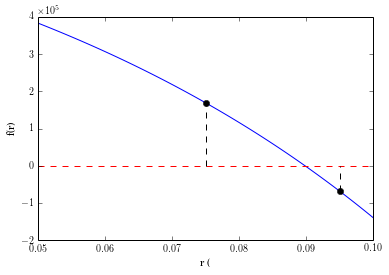

In [11]:
P = 1500.0
m = 12
n = 20.0
A = 1e6
r = numpy.linspace(0.05, 0.1, 100)
f = lambda r, A, m, P, n: A - m * P / r * ((1.0 + r / m)**(m * n) - 1.0)

fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)
axes.plot(r, f(r, A, m, P, n), 'b')
axes.plot(r, numpy.zeros(r.shape),'r--')
axes.set_xlabel("r (%)")
axes.set_ylabel("f(r)")
axes.ticklabel_format(axis='y', style='sci', scilimits=(-1,1))

a = 0.075
b = 0.095
axes.plot(a, f(a, A, m, P, n), 'ko')
axes.plot([a, a], [0.0, f(a, A, m, P, n)], 'k--')
axes.plot(b, f(b, A, m, P, n), 'ko')
axes.plot([b, b], [f(b, A, m, P, n), 0.0], 'k--')

plt.show()

### Bisection Algorithm

Given a bracket $[a,b]$ and a function $f(x)$ - 
1. Initialize with bracket
2. Iterate
   1. Cut bracket in half and check to see where the zero is
   2. Set bracket to new bracket based on what direction we went

Success!
  x* = 0.0898560248408
  f(x*) = -7.79697438702e-05
  number of steps = 29


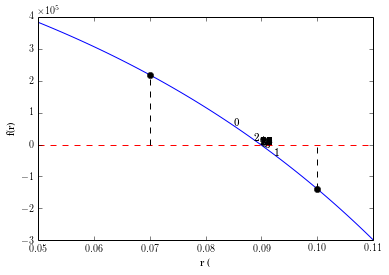

In [12]:
P = 1500.0
m = 12
n = 20.0
A = 1e6
r = numpy.linspace(0.05, 0.11, 100)
f = lambda r, A=A, m=m, P=P, n=n: A - m * P / r * ((1.0 + r / m)**(m * n) - 1.0)

# Initialize bracket
a = 0.07
b = 0.10

# Setup figure to plot convergence
fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)
axes.plot(r, f(r, A, m, P, n), 'b')
axes.plot(r, numpy.zeros(r.shape),'r--')
axes.set_xlabel("r (%)")
axes.set_ylabel("f(r)")
# axes.set_xlim([0.085, 0.091])
axes.ticklabel_format(axis='y', style='sci', scilimits=(-1,1))
axes.plot(a, f(a, A, m, P, n), 'ko')
axes.plot([a, a], [0.0, f(a, A, m, P, n)], 'k--')
axes.plot(b, f(b, A, m, P, n), 'ko')
axes.plot([b, b], [f(b, A, m, P, n), 0.0], 'k--')

# Algorithm parameters
TOLERANCE = 1e-4
MAX_STEPS = 100

# Initialize loop
f_a = f(a)
f_b = f(b)
delta_x = b - a

# Loop until we reach the TOLERANCE or we take MAX_STEPS
for step in xrange(MAX_STEPS):
    c = a + delta_x / 2.0
    f_c = f(c)
    if numpy.sign(f_a) != numpy.sign(f_c):
        b = c
        f_b = f_c
    else:
        a = c
        f_a = f_c
    delta_x = b - a
    
    # Plot iteration
    axes.text(c, f(c), str(step))
    
    # Check tolerance - Could also check the size of delta_x
    if numpy.abs(f_c) < TOLERANCE:
        break
        
if step == MAX_STEPS:
    print "Reached maximum number of steps!"
else:
    print "Success!"
    print "  x* = %s" % c
    print "  f(x*) = %s" % f(c)
    print "  number of steps = %s" % step

#### Convergence of Bisection

$$|e_{k+1}| = C |e_k|^n$$

$$e_k \approx \Delta x_k$$

$$e_{k+1} \approx \frac{1}{2} \Delta x_k$$

$$|e_{k+1}| = \frac{1}{2} |e_k|$$

$\Rightarrow$ Linear convergence